In [4]:
import numpy as np
import pandas as pd


test_data = pd.read_csv('/content/drive/MyDrive/의학통계 /test_group_data.csv')
control_data = pd.read_csv('/content/drive/MyDrive/의학통계 /control_group_data.csv')

test_df = pd.DataFrame(test_data)
control_df = pd.DataFrame(control_data)


bootstrap_iterations = 5000


P = len(test_df.columns)


def calculate_f2(test_means, control_means):
    squared_diffs = (test_means - control_means) ** 2
    sum_squared_diffs = np.sum(squared_diffs)
    f2 = 100 - 25 * np.log10(1 + (1/P) * sum_squared_diffs)
    return f2


f2_values = []
for _ in range(bootstrap_iterations):
    test_resample = test_df.sample(n=test_df.shape[0], replace=True)
    control_resample = control_df.sample(n=control_df.shape[0], replace=True)

    test_means = test_resample.mean()
    control_means = control_resample.mean()

    f2 = calculate_f2(test_means, control_means)
    f2_values.append(f2)


f2_values = np.array(f2_values)
f2_90_confidence_limit = np.percentile(f2_values, 5)  # 90% 신뢰구간의 하한은 5번째 백분위수

f2_90_confidence_limit


70.31278084112677

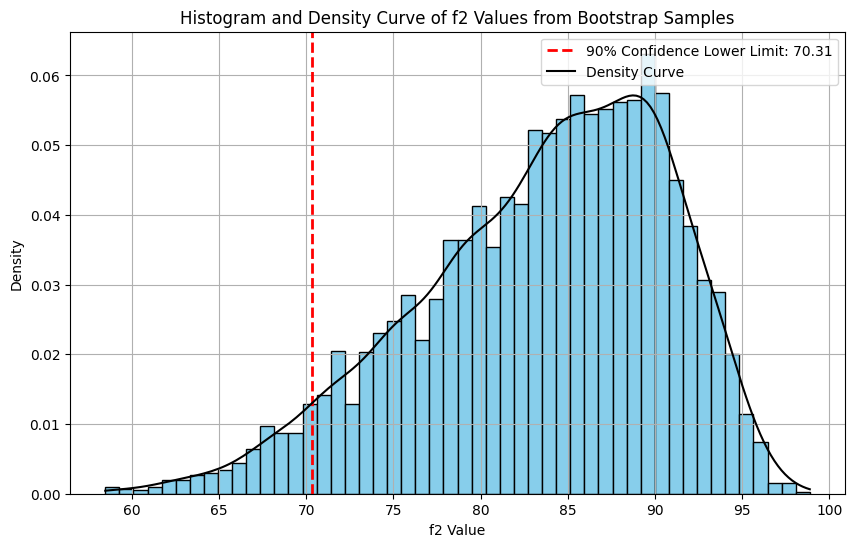

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(f2_values, bins=50, color='skyblue', edgecolor='black', density=True)
plt.axvline(f2_90_confidence_limit, color='red', linestyle='dashed', linewidth=2, label=f'90% Confidence Lower Limit: {f2_90_confidence_limit:.2f}')


from scipy.stats import gaussian_kde
density = gaussian_kde(f2_values)
xs = np.linspace(min(f2_values), max(f2_values), 200)
plt.plot(xs, density(xs), 'k-', label='Density Curve')

plt.title('Histogram and Density Curve of f2 Values from Bootstrap Samples')
plt.xlabel('f2 Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
